In [1]:
pip install earthpy


     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.4 MB 648.1 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.4 MB 651.6 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.4 MB 581.0 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.4 MB 595.3 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.4 MB 491.5 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.4 MB 544.7 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.4 MB 523.5 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.4 MB 535.8 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.4 MB 518.8 kB/s eta 0:00:03
     ------ --------------------------------- 0.2/1.4 MB 528.4 kB/s eta 0:00:03
     ------- -------------------------------- 0.3/1.4 MB 

In [66]:
# Import packages
import pandas as pd
import numpy as np
import keras
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import Model
import rasterio
import earthpy.plot as ep
from keras.utils import to_categorical, plot_model, model_to_dot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
from sklearn.model_selection import train_test_split

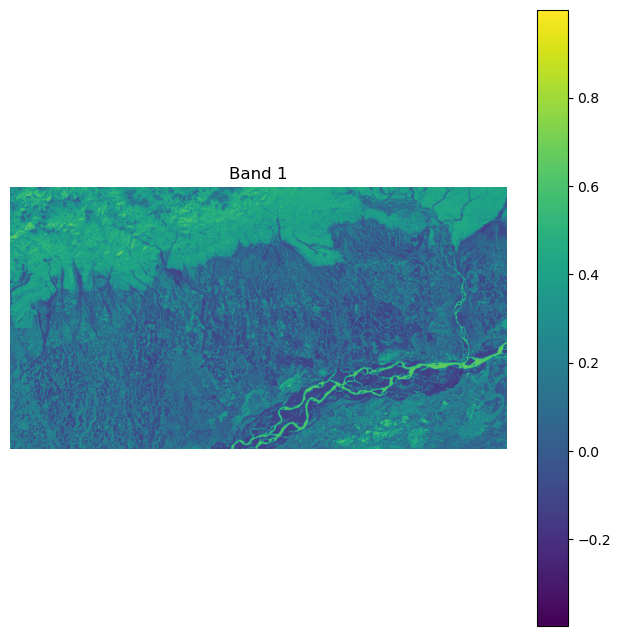

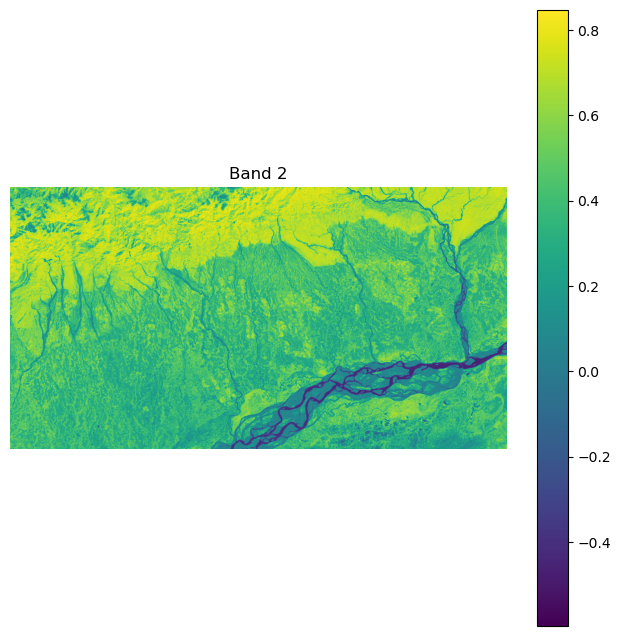

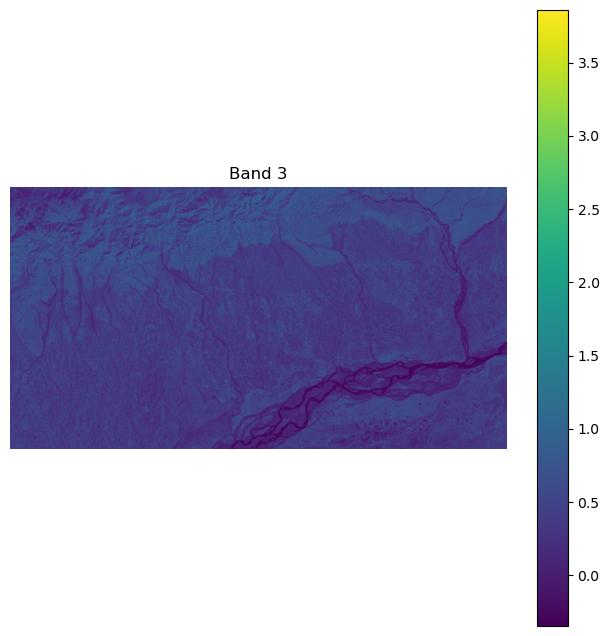

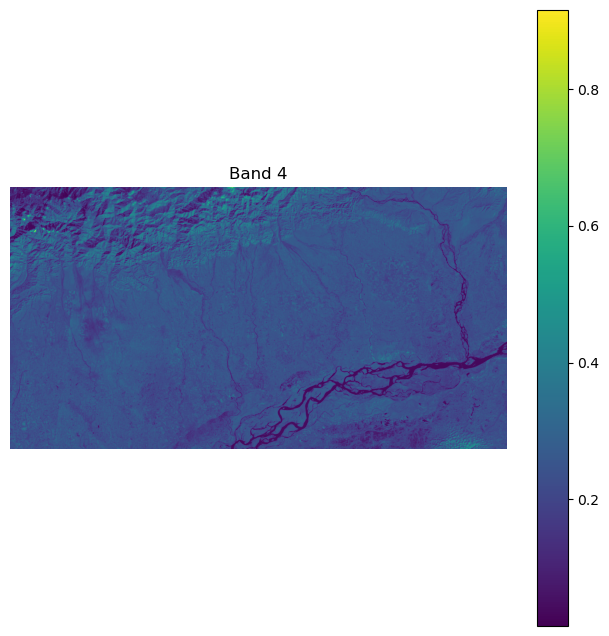

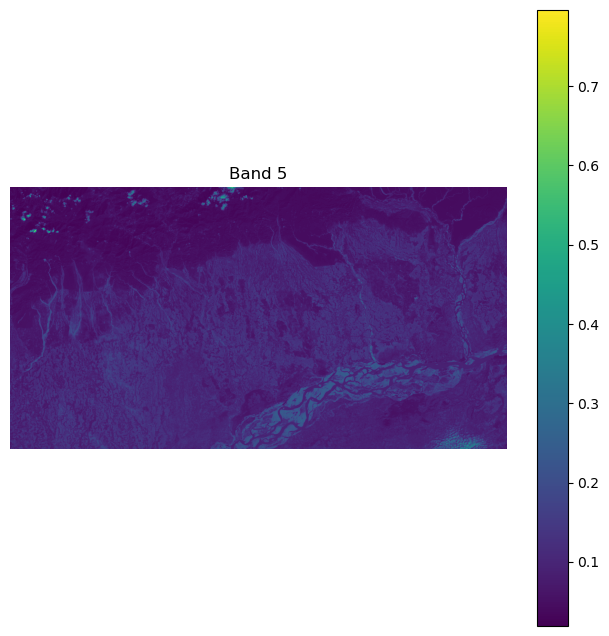

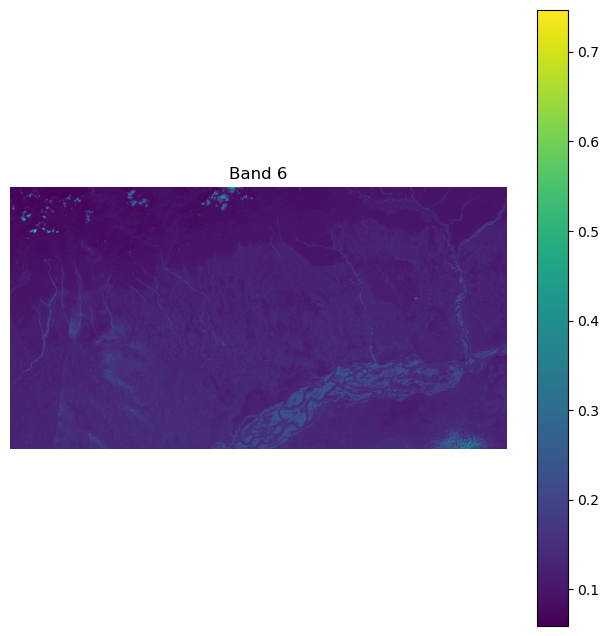

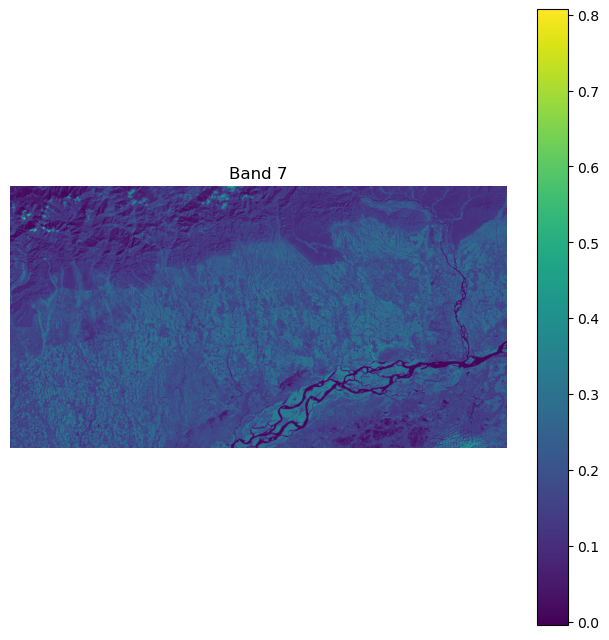

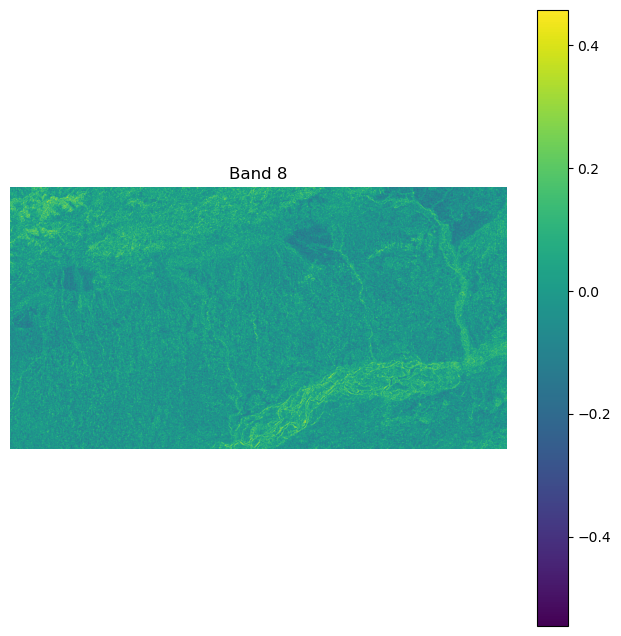

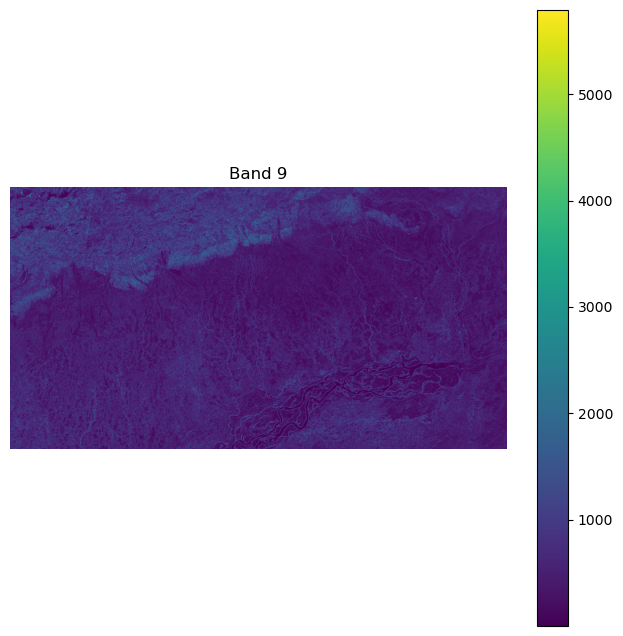

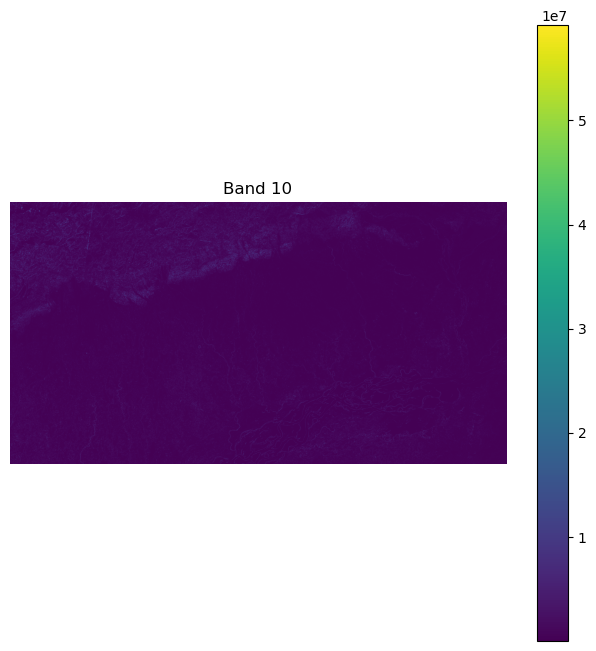

In [5]:
import rasterio
import numpy as np
import earthpy.plot as ep

# File paths for each band
BAND_PATHS = [
        ndwi= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/NDWI/Landsat_2022_01_NDWI.tif",
        ndvi= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/NDVI/Landsat_2022_01_NDVI.tif",
        evi= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/EVI_Landsat_2022_01_EVI.tif.tif",
        nir= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_NIR.tif.tif",
        red= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_RED.tif.tif",
        blue= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_BLUE.tif.tif",
        swir= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_SWIR.tif.tif",
        correlaton="D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_correlation.tif.tif",
        dissimilarity= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_dissimilarity.tif.tif",
        contrast= "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_contrast.tif.tif"
]

# Plot each band separately
for band_index, band_path in enumerate(BAND_PATHS):
    with rasterio.open(band_path) as band:
        band_data = band.read(1)  # Read the band as a numpy array

    plt.figure(figsize=(8, 8))
    plt.imshow(band_data, cmap='viridis')  # You can change the colormap as needed
    plt.title(f'Band {band_index + 1}')
    plt.colorbar()
    plt.axis('off')
    plt.show()


In [10]:
SAMPLE_PATH='D:/Jintu/Jintu_ShareFolder/TestDL_2/Signature/Shapefile/Merge Data/Test_1/Mosaic_Raster/DBF File/texture.csv'

In [8]:
import pandas as pd

# Read the CSV file containing the "class" column
samples = pd.read_csv(SAMPLE_PATH)

# Shuffle the data (optional)
samples = samples.sample(frac=1)

# Extract unique class values from the "class" column
unique_classes = samples['Class'].unique()

# Create the CLASSES list
CLASSES = list(unique_classes)

# Number of classes
N_CLASSES = len(CLASSES)

# Print the unique class values and the CLASSES list
print("Unique Class Values:", unique_classes)
print("CLASSES:", CLASSES)


Unique Class Values: [1 5 2 3 4]
CLASSES: [1, 5, 2, 3, 4]


In [80]:
import rasterio
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import earthpy.plot as ep

# File paths for each band
BAND_PATHS = {
    'NDWI': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/NDWI/Landsat_2022_01_NDWI.tif",
    'NDVI': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/NDVI/Landsat_2022_01_NDVI.tif",
    'EVI': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/EVI_Landsat_2022_01_EVI.tif.tif",
    'NIR': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_NIR.tif.tif",
    'RED': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_RED.tif.tif",
    'BLUE': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_BLUE.tif.tif",
    'SWIR': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_Landsat_2022_01_SWIR.tif.tif",
    'Correlation': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_correlation.tif.tif",
    'Dissimilarity': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_dissimilarity.tif.tif",
    'Contrast': "D:/Jintu/Jintu_ShareFolder/TestDL_2/Landsat Images/Bands/Landsat_contrast.tif.tif"
}

# Create an empty dictionary to store band data
band_data_dict = {}

# Read each band separately and store in the dictionary
for band_name, band_path in BAND_PATHS.items():
    with rasterio.open(band_path) as band:
        band_data_dict[band_name] = band.read(1)  # Read the band as a numpy array

# Define the list of features you want to use
FEATURES = [ 'NDWI', 'NDVI', 'RED', 'NIR', 'BLUE', 'EVI', 'SWIR', 'Dissimilarity', 'Contrast',  'Correlation','Class' ]

# Read the CSV file containing the "class" and "sample" columns
SAMPLE_PATH='D:/Jintu/Jintu_ShareFolder/TestDL_2/Signature/Shapefile/Merge Data/Test_1/Mosaic_Raster/DBF File/texture.csv'
df = pd.read_csv(SAMPLE_PATH)
print(df)



      OBJECTID  OID_                Name  \
0         6761     0  Untitled Placemark   
1         6762     0  Untitled Placemark   
2         6769     0  Untitled Placemark   
3         6770     0  Untitled Placemark   
4         6771     0  Untitled Placemark   
...        ...   ...                 ...   
6799       484     0           Placemark   
6800       485     0           Placemark   
6801       486     0           Placemark   
6802       487     0           Placemark   
6803       488     0           Placemark   

                                             FolderPath  SymbolID  LabelID  \
0                                     Forest.kmz/Forest         0        0   
1                                     Forest.kmz/Forest         0        0   
2                                     Forest.kmz/Forest         0        0   
3                                     Forest.kmz/Forest         0        0   
4                                     Forest.kmz/Forest         0        0   
...

In [44]:
LABEL=['Class']

In [45]:
# Shuffle the data (optional)
samples = samples.sample(frac=1)

# Extract unique class values from the "class" column
unique_classes = samples['Class'].unique()
print(unique_classes)

# Create the CLASSES list
CLASSES = list(unique_classes)

# Number of classes
N_CLASSES = len(CLASSES)






[3 1 5 2 4]


In [51]:
print(samples[FEATURES])

          NDWI      NDVI          RED          NIR         BLUE          EVI  \
4739  0.005905  0.222742     0.095941     0.217803     0.141527     0.416196   
1379  0.060412  0.497388     0.074641     0.231511     0.111560     0.465406   
6779  0.597468 -0.385589 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
1312  0.413415  0.756439     0.051278     0.369793     0.100917     0.864978   
6057 -0.113436  0.220077     0.121080     0.188922     0.139899     0.195812   
...        ...       ...          ...          ...          ...          ...   
2742 -0.079333  0.287503     0.141416     0.250921     0.137698     0.256649   
1728  0.102163  0.490664     0.066391     0.194304     0.109365     0.414008   
3787  0.185849  0.560146     0.062491     0.249005     0.111356     0.591148   
2288  0.104579  0.529377     0.062476     0.205661     0.108530     0.466987   
2638 -0.063466  0.317962     0.154704     0.295547     0.145486     0.310879   

             SWIR  Dissimilarity      C

In [52]:
print(samples[LABEL])

      Class
4739      3
1379      1
6779      5
1312      1
6057      5
...     ...
2742      4
1728      2
3787      2
2288      2
2638      4

[6804 rows x 1 columns]


In [58]:
# Split into train and test based on column
train = samples[samples['OBJECTID'] == 'train']
test = samples[samples['OBJECTID'] == 'test']

# Split between features and label
train_features = train[FEATURES]
train_label = train[LABEL]
test_features = test[FEATURES]
test_label = test[LABEL]

# Function to reshape array input
def reshape_input(array):
  shape = array.shape
  return array.reshape(shape[0], shape[1], 1)

# Convert samples dataframe (pandas) to numpy array
train_input = reshape_input(train_features.to_numpy())
test_input = reshape_input(test_features.to_numpy())

# Also make label data to categorical
train_output = to_categorical(train_label.to_numpy(), N_CLASSES + 1, int)
test_output = to_categorical(test_label.to_numpy(), N_CLASSES + 1, int)

# Show the data shape
print(f'Train features: {train_input.shape}\nTest features: {test_input.shape}\nTrain label: {train_output.shape}\nTest label: {test_output.shape}')

Train features: (0, 10, 1)
Test features: (0, 10, 1)
Train label: (0, 6)
Test label: (0, 6)


In [62]:
y = df.pop('Class')
X = df
y

0       1
1       1
2       1
3       1
4       1
       ..
6799    5
6800    5
6801    5
6802    5
6803    5
Name: Class, Length: 6804, dtype: int64

In [64]:
X

,OBJECTID,OID_,Name,FolderPath,SymbolID,LabelID,Class lebals,NDWI,NDVI,RED,NIR,BLUE,EVI,SWIR,Dissimilarity,Contrast,Correlation
0,6761,0,Untitled Placemark,Forest.kmz/Forest,0,0,Forest Area,0.427863,0.720709,0.042992,0.264874,0.096792,0.696091,0.106134,389.375000,280045.625000,-0.089622
1,6762,0,Untitled Placemark,Forest.kmz/Forest,0,0,Forest Area,0.479975,0.755801,0.045208,0.325050,0.097747,0.810478,0.114214,288.125000,122946.083300,-0.181319
2,6769,0,Untitled Placemark,Forest.kmz/Forest,0,0,Forest Area,0.380752,0.594101,0.039719,0.199653,0.094167,0.546434,0.073881,617.729167,588084.604200,0.021592
3,6770,0,Untitled Placemark,Forest.kmz/Forest,0,0,Forest Area,0.420002,0.722578,0.044322,0.275205,0.096042,0.703208,0.112407,683.187500,730131.437500,0.187252
4,6771,0,Untitled Placemark,Forest.kmz/Forest,0,0,Forest Area,0.404692,0.707466,0.045651,0.337869,0.096315,0.821374,0.136955,651.750000,589028.458300,-0.006076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,484,0,Placemark,Water BodyRiver.kmz/Water Body/River/waterbody...,1,0,Water Body,0.573771,-0.383004,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,17.770833,420.229167,0.139460
6800,485,0,Placemark,Water BodyRiver.kmz/Water Body/River/waterbody...,1,0,Water Body,0.579719,-0.382816,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,16.416667,389.375000,0.308383
6801,486,0,Placemark,Water BodyRiver.kmz/Water Body/River/waterbody...,1,0,Water Body,0.591617,-0.373113,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,9.458333,137.083333,0.261002
6802,487,0,Placemark,Water BodyRiver.kmz/Water Body/River/waterbody...,1,0,Water Body,0.559382,-0.378609,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,10.979167,188.645833,0.065978


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_test.shape

(1361, 17)

In [70]:
X_train.shape

(5443, 17)

In [73]:
y_train.shape

(5443,)

In [81]:
df['samples'] = 'train'
df.loc[X_test.index, 'samples'] = 'test'

# Create a new column 'class' and set it to the class label for each row
df['class'] = df['Class']

# Now, df contains the 'samples' column indicating whether each row is in the training or testing set,
# and the 'class' column with the class label for each row
print(df)

      OBJECTID  OID_                Name  \
0         6761     0  Untitled Placemark   
1         6762     0  Untitled Placemark   
2         6769     0  Untitled Placemark   
3         6770     0  Untitled Placemark   
4         6771     0  Untitled Placemark   
...        ...   ...                 ...   
6799       484     0           Placemark   
6800       485     0           Placemark   
6801       486     0           Placemark   
6802       487     0           Placemark   
6803       488     0           Placemark   

                                             FolderPath  SymbolID  LabelID  \
0                                     Forest.kmz/Forest         0        0   
1                                     Forest.kmz/Forest         0        0   
2                                     Forest.kmz/Forest         0        0   
3                                     Forest.kmz/Forest         0        0   
4                                     Forest.kmz/Forest         0        0   
...

In [82]:
# Split into train and test based on column
train = df[df['samples'] == 'train']
test = df[df['samples'] == 'test']

# Split between features and label
train_features = train[FEATURES]
train_label = train[LABEL]
test_features = test[FEATURES]
test_label = test[LABEL]

# Function to reshape array input
def reshape_input(array):
  shape = array.shape
  return array.reshape(shape[0], shape[1], 1)

# Convert samples dataframe (pandas) to numpy array
train_input = reshape_input(train_features.to_numpy())
test_input = reshape_input(test_features.to_numpy())

# Also make label data to categorical
train_output = to_categorical(train_label.to_numpy(), N_CLASSES + 1, int)
test_output = to_categorical(test_label.to_numpy(), N_CLASSES + 1, int)

# Show the data shape
print(f'Train features: {train_input.shape}\nTest features: {test_input.shape}\nTrain label: {train_output.shape}\nTest label: {test_output.shape}')

Train features: (5443, 10, 1)
Test features: (1361, 10, 1)
Train label: (5443, 6)
Test label: (1361, 6)


In [116]:
print(train)

      OBJECTID  OID_                Name  \
0         6761     0  Untitled Placemark   
1         6762     0  Untitled Placemark   
2         6769     0  Untitled Placemark   
3         6770     0  Untitled Placemark   
4         6771     0  Untitled Placemark   
...        ...   ...                 ...   
6798       483     0           Placemark   
6799       484     0           Placemark   
6800       485     0           Placemark   
6802       487     0           Placemark   
6803       488     0           Placemark   

                                             FolderPath  SymbolID  LabelID  \
0                                     Forest.kmz/Forest         0        0   
1                                     Forest.kmz/Forest         0        0   
2                                     Forest.kmz/Forest         0        0   
3                                     Forest.kmz/Forest         0        0   
4                                     Forest.kmz/Forest         0        0   
...

In [92]:
# Make model for our data
# Input shape
train_shape = train_input.shape
input_shape = (train_shape[1], train_shape[2])

# Model parameter
neuron = 128
drop = 0.2
kernel = 2
pool = 2

# Make sequential model
model = Sequential([
  Input(input_shape),
  Conv1D(neuron * 1, kernel, activation='relu'),
  Conv1D(neuron * 1, kernel, activation='relu'),
  MaxPooling1D(pool),
  Dropout(drop),
  Conv1D(neuron * 2, kernel, activation='relu'),
  Conv1D(neuron * 2, kernel, activation='relu'),
  MaxPooling1D(pool),
  Dropout(drop),
  GlobalMaxPooling1D(),
  Dense(neuron * 2, activation='relu'),
  Dropout(drop),
  Dense(neuron * 1, activation='relu'),
  Dropout(drop),
  Dense(N_CLASSES + 1, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 9, 128)            384       
                                                                 
 conv1d_5 (Conv1D)           (None, 8, 128)            32896     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 4, 128)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 4, 128)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 3, 256)            65792     
                                                                 
 conv1d_7 (Conv1D)           (None, 2, 256)            131328    
                                                      

In [100]:
# Make a sequential model
model = Sequential([
    Input(input_shape),
    Conv1D(neuron * 2, kernel, activation='relu'),  # Increased number of filters
    Conv1D(neuron * 2, kernel, activation='relu'),  # Increased number of filters
    MaxPooling1D(pool),
    Dropout(drop),
    Conv1D(neuron * 4, kernel, activation='relu'),  # Increased number of filters
    Conv1D(neuron * 4, kernel, activation='relu'),  # Increased number of filters
    MaxPooling1D(pool),
    Dropout(drop),
    GlobalMaxPooling1D(),
    Dense(neuron * 4, activation='relu'),  # Increased number of neurons in this layer
    Dropout(drop),
    Dense(neuron * 2, activation='relu'),
    Dropout(drop),
    Dense(N_CLASSES + 1, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 9, 256)            768       
                                                                 
 conv1d_9 (Conv1D)           (None, 8, 256)            131328    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 4, 256)            0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 4, 256)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 3, 512)            262656    
                                                                 
 conv1d_11 (Conv1D)          (None, 2, 512)            524800    
                                                      

In [101]:
# Train the model

# Compline the model
model.compile(
    optimizer='Adam',
    loss='CategoricalCrossentropy',
    metrics=['accuracy']
)

# Create callback to stop training if loss not decreasing
stop = EarlyStopping(
    monitor='loss',
    patience=5
)

# Fit the model
result = model.fit(
    x=train_input, y=train_output,
    validation_data=(test_input, test_output),
    batch_size=2000,
    callbacks=[stop],
    epochs=25,
)

Epoch 1/25
3/3 [==============================] - 3s 666ms/step - loss: 6466.3472 - accuracy: 0.2238 - val_loss: 3570.7444 - val_accuracy: 0.1947
Epoch 2/25
3/3 [==============================] - 2s 587ms/step - loss: 2753.8342 - accuracy: 0.2036 - val_loss: 1247.6719 - val_accuracy: 0.3152
Epoch 3/25
3/3 [==============================] - 2s 600ms/step - loss: 720.6136 - accuracy: 0.2499 - val_loss: 243.5308 - val_accuracy: 0.2601
Epoch 4/25
3/3 [==============================] - 2s 580ms/step - loss: 394.8911 - accuracy: 0.2107 - val_loss: 171.0240 - val_accuracy: 0.1954
Epoch 5/25
3/3 [==============================] - 2s 597ms/step - loss: 239.2588 - accuracy: 0.2528 - val_loss: 36.9713 - val_accuracy: 0.2439
Epoch 6/25
3/3 [==============================] - 2s 576ms/step - loss: 151.7425 - accuracy: 0.2190 - val_loss: 26.2229 - val_accuracy: 0.0985
Epoch 7/25
3/3 [==============================] - 2s 605ms/step - loss: 95.5356 - accuracy: 0.2269 - val_loss: 24.0326 - val_accuracy:

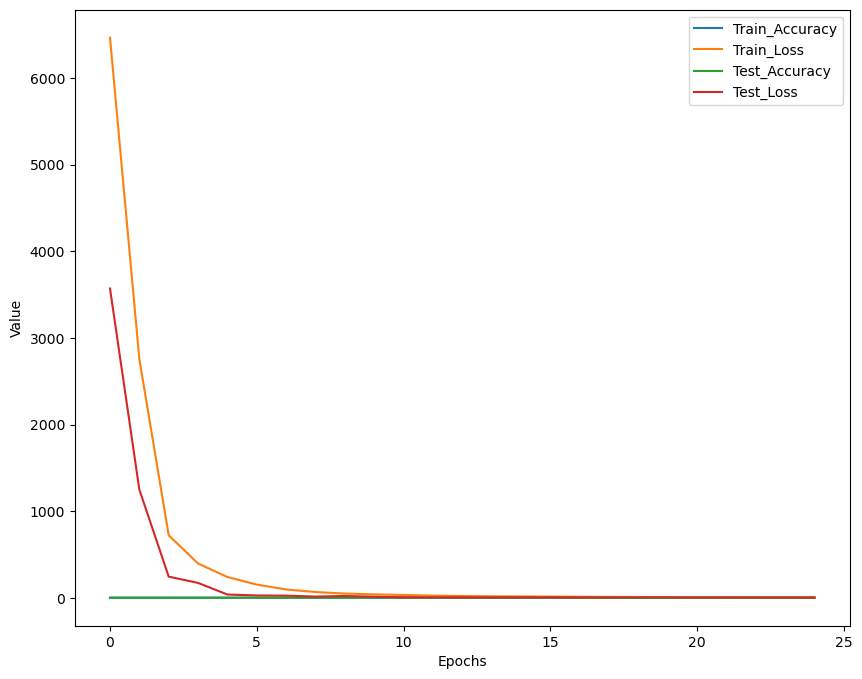

In [113]:
# Show history
history = pd.DataFrame(result.history)

plt.figure(figsize = (10, 8))
plt.plot(range(len(history['accuracy'].values.tolist())), history['accuracy'].values.tolist(), label = 'Train_Accuracy')
plt.plot(range(len(history['loss'].values.tolist())), history['loss'].values.tolist(), label = 'Train_Loss')
plt.plot(range(len(history['val_accuracy'].values.tolist())), history['val_accuracy'].values.tolist(), label = 'Test_Accuracy')
plt.plot(range(len(history['val_loss'].values.tolist())), history['val_loss'].values.tolist(), label = 'Test_Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [107]:
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, GlobalMaxPooling1D, Dense
from sklearn.metrics import accuracy_score
from scipy import stats

In [115]:
# Make a sequential model
dl_model = Sequential([
    Input(input_shape),
    Conv1D(neuron * 2, kernel, activation='relu'),  # Increased number of filters
    Conv1D(neuron * 2, kernel, activation='relu'),  # Increased number of filters
    MaxPooling1D(pool),
    Dropout(drop),
    Conv1D(neuron * 4, kernel, activation='relu'),  # Increased number of filters
    Conv1D(neuron * 4, kernel, activation='relu'),  # Increased number of filters
    MaxPooling1D(pool),
    Dropout(drop),
    GlobalMaxPooling1D(),
    Dense(neuron * 4, activation='relu'),  # Increased number of neurons in this layer
    Dropout(drop),
    Dense(neuron * 2, activation='relu'),
    Dropout(drop),
    Dense(N_CLASSES + 1, activation='softmax')
])

dl_model.summary()

# Train the model

# Compline the model
dl_model.compile(
    optimizer='Adam',
    loss='CategoricalCrossentropy',
    metrics=['accuracy']
)

# Create callback to stop training if loss not decreasing
stop = EarlyStopping(
    monitor='loss',
    patience=5
)

# Fit the model
result = dl_model.fit(
    x=train_input, y=train_output,
    validation_data=(test_input, test_output),
    batch_size=2000,
    callbacks=[stop],
    epochs=25,
)
# Make predictions using the deep learning model
dl_predictions = dl_model.predict(test_input)

# Create the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest model
rf_model.fit(train_input.reshape(train_input.shape[0], -1), np.argmax(train_output, axis=1))

# Make predictions using the random forest model
rf_predictions = rf_model.predict(test_input.reshape(test_input.shape[0], -1))

# Combine predictions from both models using a voting scheme
ensemble_predictions = np.argmax(dl_predictions, axis=1)
ensemble_predictions = np.column_stack((ensemble_predictions, rf_predictions))
final_predictions = stats.mode(ensemble_predictions, axis=1).mode.flatten()

# Evaluate the ensemble model's accuracy
accuracy = accuracy_score(np.argmax(test_output, axis=1), final_predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_44 (Conv1D)          (None, 9, 256)            768       
                                                                 
 conv1d_45 (Conv1D)          (None, 8, 256)            131328    
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 4, 256)            0         
 ng1D)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 4, 256)            0         
                                                                 
 conv1d_46 (Conv1D)          (None, 3, 512)            262656    
                                                                 
 conv1d_47 (Conv1D)          (None, 2, 512)            524800    
                                                     